In [2]:
import pandas as pd
import numpy as np
import cPickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scikits import bootstrap as boot
import scipy
import custom_image_toolkit as c
import seaborn as sns

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
strain_db={'yFB29':r'pGAL1-WHI5-mVenNB', 'yFB30':r'pGAL1-WHI5-mVenNB, $\Delta$bck2',
           'yFB41':r'pWHI5-WHI5-mVenNB', 'yFB43':r'pWHI5-WHI5-mVenNB', 'yFB25':r'WT', 'yFB86':r'pGAL1-CLN3',
          'yFB45':r'pWHI5-WHI5-mVenNB, $\Delta$bck2', 'yFB46':r'pWHI5-WHI5-mVenNB, $\Delta$bck2',
           'yFB78':r'pGAL1-WHI5-mVenNB','yFB79':r'pWHI5-WHI5-mVenNB',
          'yFB93':r'WT MATa', 'yFB94':r'WT MAT$\alpha$', 'yFB95':r'WT MAT$\alpha$ -leu',
          'yFB96':r'$\Delta$whi5', 'yFB97':r'$\Delta$cln3', 'yFB98':'$\Delta$bck2',
          'yFB99':r'$\Delta$swe1', 'yFB100':r'$\Delta$cln3, $\Delta$whi5',
           'yFB101':r'$\Delta$whi5, $\Delta$bck2',
           'yFB102':r'$\Delta$whi5, $\Delta$cln3, $\Delta$bck2',
           'yFB103':r'$\Delta$whi5, $\Delta$bck2, $\Delta$swe1',
           'yFB104':r'$\Delta$whi5, $\Delta$cln3, $\Delta$bck2, $\Delta$swe1',
          'yFB108':r'$\Delta$whi5, $\Delta$cln3, $\Delta$swe1'}

In [7]:
expt_ids = ['/190403_timepoint', '/190417_timepoint', '/190607_timepoint', '/190322_timepoint']
for ind in range(len(expt_ids)):
    expt_id = expt_ids[ind]
    pickle_in = open("./expt_ids"+expt_id+'.pkl',"rb")
    temp_df = pickle.load(pickle_in)
    temp_df['expt_id'] = expt_id
    if ind==0:
        df1=temp_df
    elif ind==4:
        temp_df['ellipse_volume']=temp_df['ellipse_volume']*(0.16/0.267)**2
        df1=df1.append(temp_df)
    else:
        df1=df1.append(temp_df)
        
df1['pixel_thresh_fluor_vals_av'] = df1['pixel_thresh_fluor_vals']/df1['pixel_thresh_vol']
df1['pixel_thresh_fluor_vals_av_c2'] = df1['pixel_thresh_fluor_vals_c2']/df1['pixel_thresh_vol']
df1['nucl_cyt_fluor_ratio'] = df1['nuclear_fluor_int']/df1['cytoplasmic_fluor_int']
df1['nucl_cyt_fluor_ratio_c2'] = df1['nuclear_fluor_int_c2']/df1['cytoplasmic_fluor_int_c2']
df1['nucl_cyt_vol_ratio'] =  df1['nuclear_vol']/(df1['pixel_thresh_vol']-df1['nuclear_vol'])
df1['zproj_fluor_vals_conc'] = df1['zproj_fluor_vals']/df1['ellipse_volume']
df1['strain_num'] = [df1.iloc[i0].Strain[:5] for i0 in range(len(df1))]
df1['gal_conc'] = [df1.iloc[i0].Strain[6:] for i0 in range(len(df1))]
df1['genotype'] = [strain_db[df1.iloc[i0].strain_num] for i0 in range(len(df1))]
df1['Condition'] = [df1.iloc[i0].genotype[:10] +', '+df1.iloc[i0].gal_conc for i0 in range(len(df1))]
df1['Condition1'] = [df1.iloc[i0].genotype +', '+df1.iloc[i0].gal_conc for i0 in range(len(df1))]
df1['Condition2'] = [df1.iloc[i0].Condition + ', '+df1.iloc[i0].expt_id[1:] for i0 in range(len(df1))]
# this normalizes the fluorescence values relative to WT for each condition so that it is easier to see the 
# differences

x=df1.expt_id =='/190322_timepoint'
y=df1.nuclear_whi5==1
z=df1.strain_num=='yFB79'
df1.loc[x&y,'pixel_thresh_fluor_vals_av'] = df1[x&y].pixel_thresh_fluor_vals_av/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av)
df1.loc[x&y,'pixel_thresh_fluor_vals_av_c2'] = df1[x&y].pixel_thresh_fluor_vals_av_c2/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av_c2)
x=df1.expt_id !='/190322_timepoint'
df1.loc[x&y,'pixel_thresh_fluor_vals_av'] = df1.loc[x&y].pixel_thresh_fluor_vals_av/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av)
df1.loc[x&y,'pixel_thresh_fluor_vals_av_c2'] = df1[x&y].pixel_thresh_fluor_vals_av_c2/np.mean(df1[x&y&z].pixel_thresh_fluor_vals_av_c2)

# selecting only cells that are in G1
y=df1.nuclear_whi5==1
df1=df1[y]

yFB78_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
0.023453160334076396 0.11375973092311041
yFB79_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
-0.32213293981733665 -0.22501932640960795
9.640414941344687 0.03630791203249249
CDF for this z value 1.0
This is a statistically significant difference
yFB78_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
0.08352582891819013 0.19842249783140717
yFB79_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
-0.5107025079184004 -0.40059118239024116
15.391877504277893 0.04128419307030668
CDF for this z value 1.0
This is a statistically significant difference
yFB78_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
0.08785720360457652 0.21871859177390612
yFB79_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
-0.3750288138680631 -0.2707207420513976
14.33106027730177 0.03469612383445115
CDF for this z value 1.0
This is a statistically significant difference
['190322, pGAL1-WHI5', '190322, pWHI5-WHI5', '190403, pGAL1-WHI5'

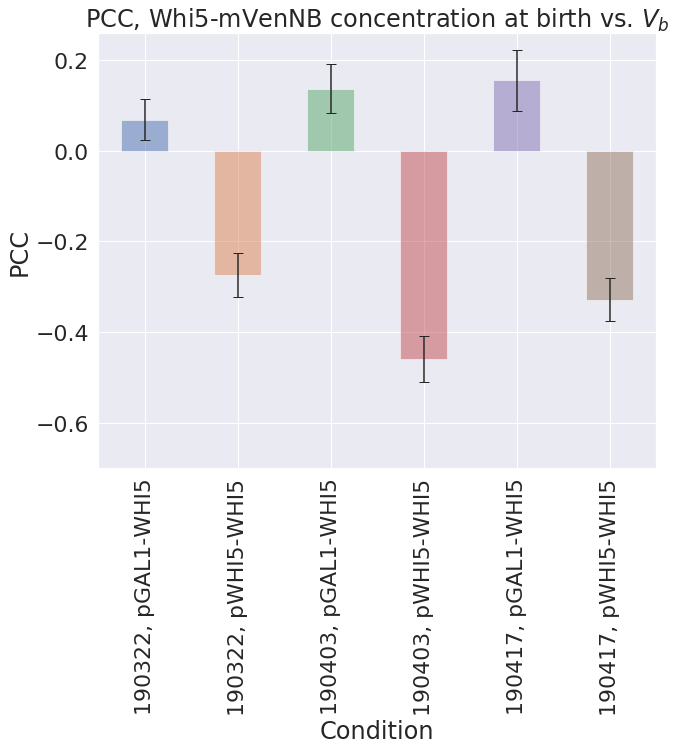

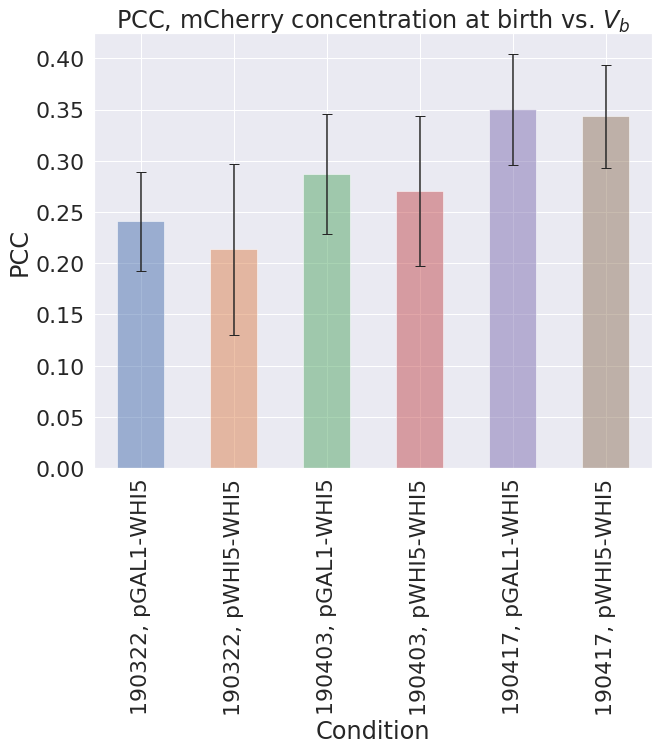

In [119]:
nucl_whi5 = 1
expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5-mVenNB', 'pWHI5-WHI5-mVenNB']
label1 = [r'$P_{GAL1}-WHI5$', r'$P_{WHI5}-WHI5$']
fluor = ['Whi5-mVenNB', 'mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

for ind in range(len(y)):
    vals = [[],[]]
    label = []
    for ind0 in range(len(expt_ids)):
        zvals=[]
        for ind1 in range(len(Strains)):
            print Strains[ind1], y[ind], expt_ids[ind0]
            v1=df1.Strain==Strains[ind1]
            v2=df1.nuclear_whi5 == 1
            v3 = df1.expt_id==expt_ids[ind0]
            label.append(expt_ids[ind0][1:7]+', '+genotype[ind1][:10])
            z = boot.ci((df1[v1 & v2&v3][x],df1[v1 & v2&v3][y[ind]]), scipy.stats.pearsonr)
            vals[0].append(scipy.stats.pearsonr(df1[v1&v2&v3][x], df1[v1&v2&v3][y[ind]])[0])
            vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
            zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df1[v1&v2&v3][x])-3)])
            print z[0][0], z[1][0]
        zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
        print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
        print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
        if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
            print 'This is not statistically significant'
        else:
        #     props = {'connectionstyle':'bar','arrowstyle':'-',\
        #                  'shrinkA':20,'shrinkB':20,'linewidth':2}
        #     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
            print 'This is a statistically significant difference'

    temp1 = pd.DataFrame(columns = ['slope', 'label'])
    temp1['slope'] = vals[0]
    temp1['label'] = label
    print label
    sns.set(font_scale=2.0)
    plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
    plt.title('PCC, '+fluor[ind]+' concentration at birth vs. $V_b$')
    plt.xlabel('Condition')
    plt.ylabel('PCC')
    fig=plot.get_figure()
    if ind==0:
        plt.ylim(ymin=-0.7)
    fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/PCC_comp_'+fluor[ind]+'.png',bbox_inches='tight')


yFB78_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
0.00014479696837947997 0.0006824796999928165
yFB78_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
0.00023994630866948293 0.0006257561754134186
yFB78_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
0.0006263744568619566 0.0019571537914493393
yFB79_125uMGal pixel_thresh_fluor_vals_av /190322_timepoint
-0.0003656078980954992 -0.00025972046981453093
yFB79_125uMGal pixel_thresh_fluor_vals_av /190403_timepoint
-0.0012347240009190927 -0.0008824905759999682
yFB79_125uMGal pixel_thresh_fluor_vals_av /190417_timepoint
-0.0006387957007229415 -0.0004221146956274223
['190322, pGAL1-WHI5', '190403, pGAL1-WHI5', '190417, pGAL1-WHI5', '190322, pWHI5-WHI5', '190403, pWHI5-WHI5', '190417, pWHI5-WHI5']
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190322_timepoint
0.0002015784463597028 0.00031130888821358547
yFB78_125uMGal pixel_thresh_fluor_vals_av_c2 /190403_timepoint
0.0004971478902805576 0.0008032161276284967
yFB78_125uMGal pixe

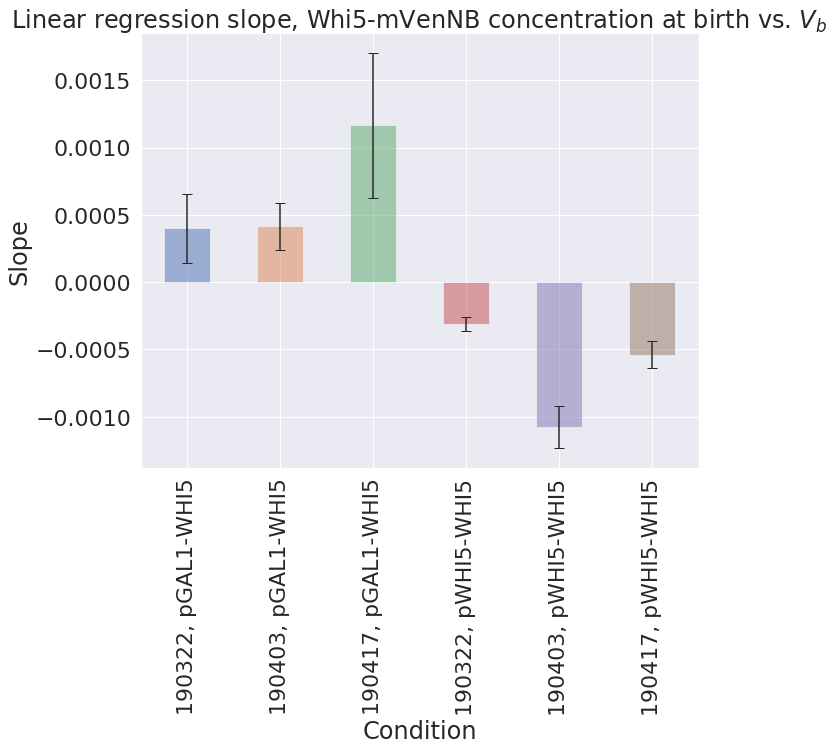

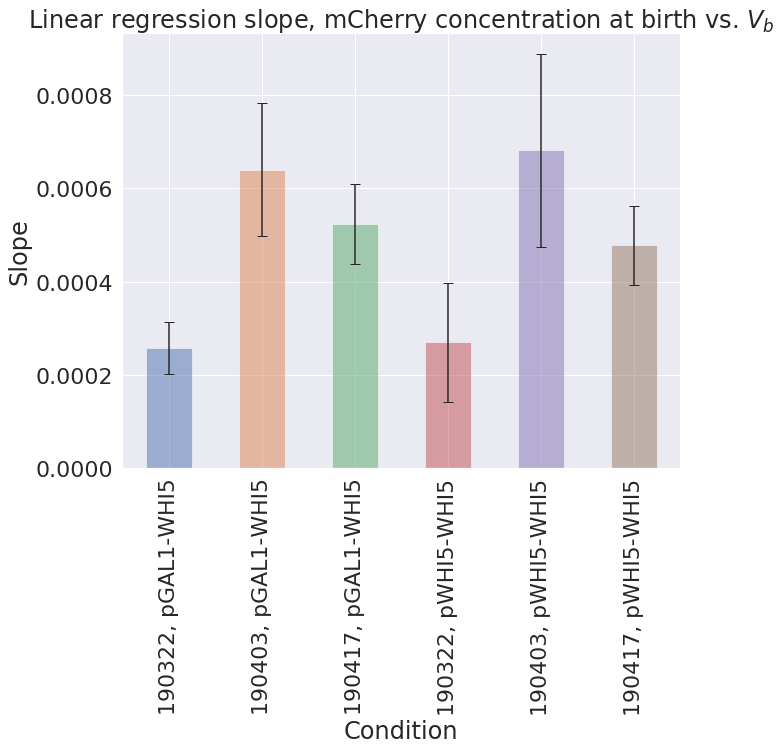

In [272]:
nucl_whi5 = 1
expt_ids = ['/190322_timepoint', '/190403_timepoint', '/190417_timepoint']
Strains = ['yFB78_125uMGal', 'yFB79_125uMGal']
genotype = ['pGAL1-WHI5-mVenNB', 'pWHI5-WHI5-mVenNB']
fluor = ['Whi5-mVenNB', 'mCherry']
x = 'pixel_thresh_vol'
y=['pixel_thresh_fluor_vals_av', 'pixel_thresh_fluor_vals_av_c2']

for ind in range(len(y)):
    vals = [[],[]]
    label = []
    for ind1 in range(len(Strains)):
        for ind0 in range(len(expt_ids)):
            print Strains[ind1], y[ind], expt_ids[ind0]
            v1=df1.Strain==Strains[ind1]
            v2=df1.nuclear_whi5 == 1
            v3 = df1.expt_id==expt_ids[ind0]
            label.append(expt_ids[ind0][1:7]+', '+genotype[ind1][:10])
            z = boot.ci((df1[v1 & v2&v3][x],df1[v1 & v2&v3][y[ind]]), scipy.stats.linregress)
            vals[0].append(scipy.stats.linregress(df1[v1&v2&v3][x], df1[v1&v2&v3][y[ind]])[0])
            vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
            print z[0][0], z[1][0]
    temp1 = pd.DataFrame(columns = ['slope', 'label'])
    temp1['slope'] = vals[0]
    temp1['label'] = label
    print label
    sns.set(font_scale=2.0)
    plot = temp1.plot(x='label',y='slope',kind='bar',yerr=zip(*vals[1]),legend=False,capsize=5.0,alpha=0.5, figsize=[10,8])
    plt.title('Linear regression slope, '+fluor[ind]+' concentration at birth vs. $V_b$')
    plt.xlabel('Condition')
    plt.ylabel('Slope')
    fig=plot.get_figure()
    fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/correlations_perturbation/LR_Slope_comp_'+fluor[ind]+'.png',bbox_inches='tight')